In [3]:
import numpy as np
import pandas as pd
import sklearn
import urllib
from matplotlib import pyplot as plt
import seaborn as sns
import string

### Cleaning

In [36]:
df_19 = pd.read_csv("/Users/qianzach/Desktop/Datafest-2021/US/nmurx_us_19Q1.csv")
df_18 = pd.read_csv("/Users/qianzach/Desktop/Datafest-2021/US/us_18Q1.csv")

### Alcohol Usage

In [46]:
def alcBin(df):
    if df["ALC_USE"] <= 2:
        val = 0 #NOT Misuse
    else:
        val = 1
    return val
temp = df_18["ALC_USE"]
temp = pd.DataFrame(data=temp)
temp["Risk"] =  temp.apply(alcBin,axis=1)


In [83]:
#sns.countplot(x= "Risk", data=temp)
#temp.Risk.value_counts()

## Checking Substance Abuse:  ALCOHOL, PRESCRIPTION, DRUGS, OTHER

In [82]:
sub_abuse = ["HELP_SUB_USE","HELP_SUB_USE_ALC", "HELP_SUB_USE_PREDRGS", "HELP_SUB_USE_OTH"]
#for i in sub_abuse:
#    print(df_18[i].value_counts())
#    #sns.countplot(x= i, data=df_18)

In [81]:
opioids = ["OPIOID_DEP_METH", "OPIOID_DEP_BUP", "OPIOID_DEP_HER", "OPIOID_DEP_OTH", "OPIOID_DEP_NO"]
#for i in opioids:
#    print(df_18[i].value_counts())

# Day 2

We will run an ML model that consists of Schedule 1 Drugs and predict its misuse with Schedule 1 Drug: 
```
ELU_USE
BAC_USE
CANN_USE
MDMA_USE
GHB_USE
KRAT_USE
HEROIN_USE
MEPH_USE
LSD_USE
MUSH_USE
SPICE_USE
SAL_USE
```


In [ ]:
def alcBin(df):
    if df["ALC_USE"] <= 2:
        val = 0 #NOT Misuse
    else:
        val = 1
    return val

In [77]:
df = pd.DataFrame(data=df_19[["ELU_USE","BAC_USE","CANN_USE","MDMA_USE","GHB_USE","KRAT_USE","HEROIN_USE","MEPH_USE","LSD_USE","MUSH_USE","SPICE_USE","SAL_USE"]])
s1 = ["ELU_USE","BAC_USE","CANN_USE","MDMA_USE","GHB_USE","KRAT_USE","HEROIN_USE","MEPH_USE","LSD_USE","MUSH_USE","SPICE_USE","SAL_USE"]
def s1_T(c):
    """
    Collapse columns of Schedule 1 Drug Use into a Single Binary Column. This  will be used as our target variable
    """
        if c[s1[0]] == 1 or c[s1[1]]==1 or c[s1[2]]==1 or c[s1[3]]==1 or c[s1[4]]==1 or c[s1[5]]==1 or c[s1[6]]==1 or c[s1[7]]==1 or c[s1[8]]==1 or c[s1[9]] ==1  or c[s1[10]]==1 or c[s1[11]] ==1:
            val = 1
        else:
            val = 0
        return val
df["S1_Misuse"]  = df.apply(s1_T,axis=1)

In [79]:
5212/24661 #Prints relative distribution

0.2113458497222335

In [78]:
df["S1_Misuse"].value_counts()

0    24661
1     5212
Name: S1_Misuse, dtype: int64

In [90]:
df = pd.DataFrame(data=df["S1_Misuse"])
print(df.shape)

(29873, 1)


## Feature Matrix Creation

We proceed to collapse the race columns into one with multiple factors.

AGE10 is in age group bins as well.

In [91]:
df2 = df_19[["DEM_GENDER","DEM_AGE10","DEM_REGION","DEM_INCOME","DEM_HOME","DEM_GENHEALTH","DEM_LIMIT","TOB_LIFE","DEM_HISPANIC",
"DEM_RACE_AIAN","DEM_RACE_ASIAN","DEM_RACE_BLACK","DEM_RACE_NHPI","DEM_RACE_WHITE","DEM_RACE_OTH","DEM_MARITAL",
"DEM_EDU","DEM_STDNT","DEM_VET","DEM_HEALTH","DEM_EMPLOY","DEM_INSUR","DEM_HOSPSTAY"]]

def race_T(df):
    """
    Collapses DEM_RACE_xxx column into single factor 
    """
    if df["DEM_RACE_WHITE"] == 1:
        val = 0 
    elif df["DEM_RACE_AIAN"] == 1:
        val = 1
    elif df["DEM_RACE_ASIAN"] == 1:
        val = 2
    elif df["DEM_RACE_BLACK"] == 1:
        val = 3 
    elif df["DEM_RACE_NHPI"] == 1:
        val = 4
    elif df["DEM_RACE_OTH"] == 1:
        val = 5
    return val

df2["RACE"]  = df2.apply(race_T,axis=1)

df2 = df2.drop(["DEM_RACE_AIAN","DEM_RACE_ASIAN","DEM_RACE_BLACK","DEM_RACE_NHPI","DEM_RACE_WHITE","DEM_RACE_OTH"], axis=1)

df = pd.DataFrame(data = df["S1_Misuse"])

df_final = pd.concat([df2,df], axis = 1)

<ipython-input-91-91e618b53e48>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["RACE"]  = df2.apply(race_T,axis=1)


In [92]:
df_final.head()

,DEM_GENDER,DEM_AGE10,DEM_REGION,DEM_INCOME,DEM_HOME,DEM_GENHEALTH,DEM_LIMIT,TOB_LIFE,DEM_HISPANIC,DEM_MARITAL,DEM_EDU,DEM_STDNT,DEM_VET,DEM_HEALTH,DEM_EMPLOY,DEM_INSUR,DEM_HOSPSTAY,RACE,S1_Misuse
0,2,4,3,4,3,2,0,1,0,1,4,0,0,0,1,1,0,0,1
1,2,6,2,1,1,2,1,3,0,3,2,0,0,0,0,0,0,0,0
2,2,6,3,4,2,4,0,3,0,1,2,0,0,0,0,1,0,0,0
3,2,6,4,2,1,4,0,1,0,3,3,0,0,0,1,1,0,0,0
4,2,6,2,2,2,4,0,3,0,1,2,0,0,0,0,1,0,0,0


# Modeling: Supervised Machine Learning Implementation

##  I. Preprocessing

In [123]:
from sklearn import preprocessing

def clean(df):
    """
    One-hot encoding for the labels
    """
    le = preprocessing.LabelEncoder() #change our categorical to discrete numerics
    #df["DATE"] = le.fit_transform(df["DATE"])
    for i in df.columns:
        df[i] = le.fit_transform(df[i])
    #df["RACE"] = le.fit_transform(df["RACE"])
    #df["DEM_AGE10"] = le.fit_transform(df["DEM_AGE10"])
    #df["DEM_AGE10"] = le.fit_transform(df["DEM_AGE10"])
    return df


y = df_final["S1_Misuse"]
x = df_final.drop("S1_Misuse",axis=1)
    
print(x.shape, y.shape)

(29873, 18) (29873,)


In [122]:
x.DEM_INSUR

0        1
1        0
2        1
3        1
4        1
        ..
29868    1
29869    1
29870    1
29871    1
29872    1
Name: DEM_INSUR, Length: 29873, dtype: int64

In [120]:
x.columns

Index(['DEM_GENDER', 'DEM_AGE10', 'DEM_REGION', 'DEM_INCOME', 'DEM_HOME',
       'DEM_GENHEALTH', 'DEM_LIMIT', 'TOB_LIFE', 'DEM_HISPANIC', 'DEM_MARITAL',
       'DEM_EDU', 'DEM_STDNT', 'DEM_VET', 'DEM_HEALTH', 'DEM_EMPLOY',
       'DEM_INSUR', 'DEM_HOSPSTAY', 'RACE'],
      dtype='object')

# II. Splitting Data

In [125]:
from sklearn.model_selection import train_test_split

np.random.seed(1000) #set seed
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20) #split 80 20 test

## III. Gridsearch CV

In [126]:
#Load dependencies for feature selection and model training
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import neural_network

def gridsearch(x,y,k):
    """
    Rudimentary gridsearch I implemented in Homework 7 in a function. Takes values in a list of arrays and 
    tests each value for our C value. 
    """
    #printing out graph and finding best params
    fig, ax = plt.subplots(1, figsize = (20, 20))
    best_score = -1000000 #set abritrary number
    best_depth = 0
    arr = [.001,.01,1,10,100,1000]
    for i in arr:

        lr = LogisticRegression(C=i, max_iter = 10000)
        cv_score = sklearn.model_selection.cross_val_score(lr,x, y, cv =k).mean()
        #set kfold CV to 10
        if best_score < cv_score:
            best_score = cv_score
            best_depth = i
        ax.scatter(i,cv_score)
        ax.set(xlabel = "C Value", ylabel = "Cross Validation Score")

    ax.set( title = "ML: Finding C Regularization Value: " +  str(best_depth) + " with score: " +  str(best_score))
    return (best_depth, best_score)

0.01 0.8302788057537074


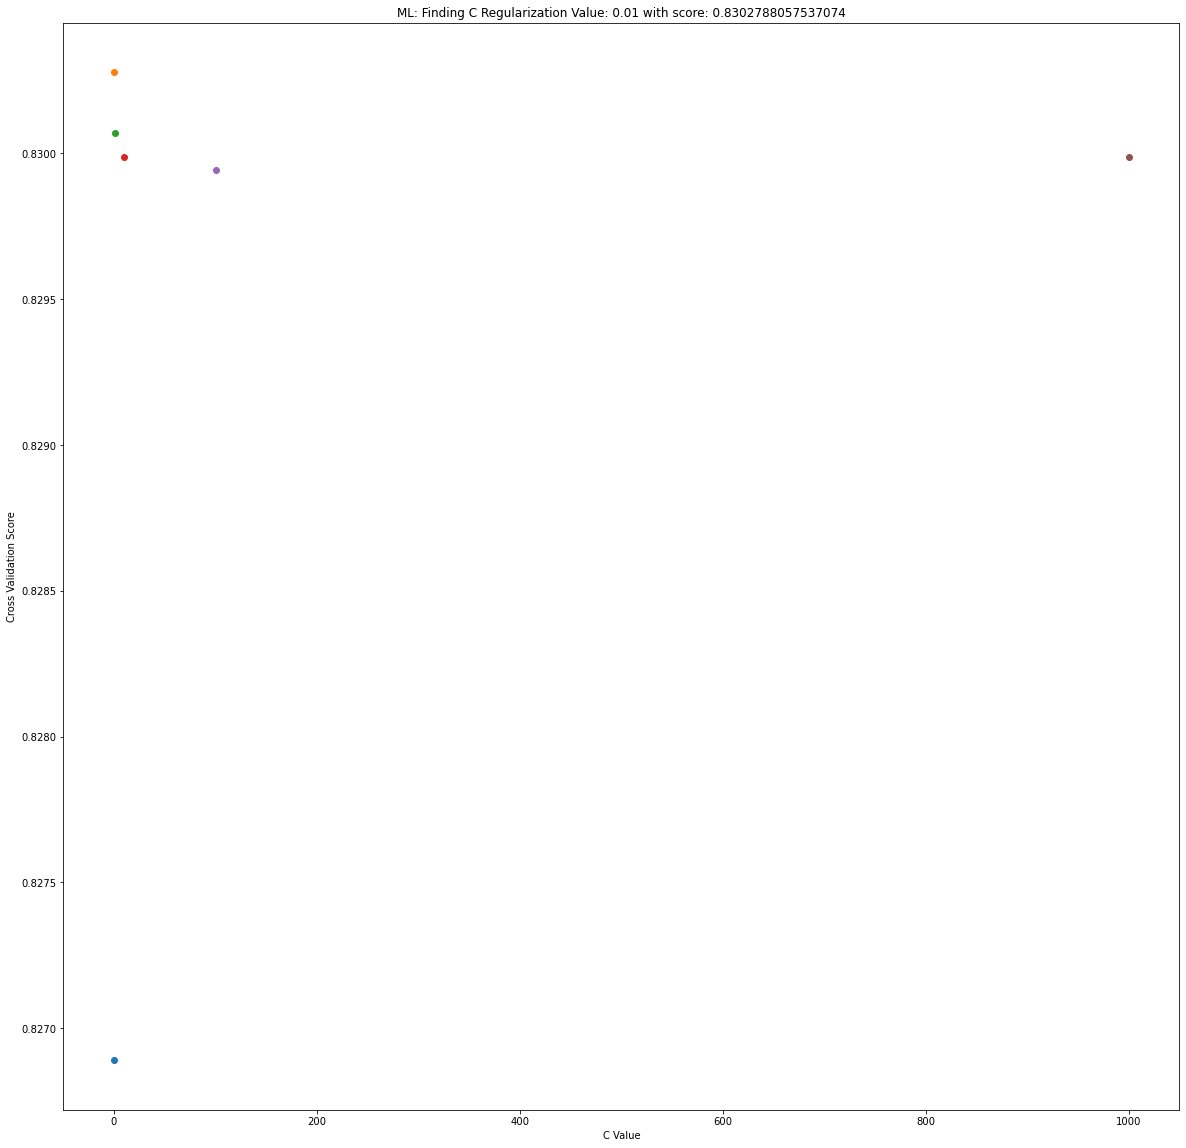

In [127]:
(best_depth, best_score) = gridsearch(x_train,y_train,k=10)
print(best_depth, best_score)

## Logistic Regression

In [129]:
np.random.seed(1000) #set seed
ideal_LR = LogisticRegression(C=best_depth, max_iter=10000)
ideal_LR.fit(x_train,y_train)
LR_score = ideal_LR.score(x_test,y_test)
print("Best score: ", LR_score)

Best score:  0.830460251046025


In [173]:
print("AUC score: ", roc_auc_score(y_test, ideal_LR.predict_proba(x_test)[:, 1]))

AUC score:  0.726225482124122


In [131]:
result_df = pd.DataFrame({"coef" : ideal_LR.coef_[0], "word" : x_train.columns}) #creates a results dataframe to 
#look at more coefficients

In [132]:
most_neg = result_df.sort_values('coef', ascending = True)[0:25]
most_neg #sort ascending starting with the most negative
#this shows fake-related columns

,coef,word
7,-0.562963,TOB_LIFE
0,-0.435126,DEM_GENDER
1,-0.237151,DEM_AGE10
15,-0.164798,DEM_INSUR
17,-0.112810,RACE
5,-0.083122,DEM_GENHEALTH
12,-0.055137,DEM_VET
11,-0.032667,DEM_STDNT
3,-0.020440,DEM_INCOME
10,0.000112,DEM_EDU


In [133]:
most_neg = result_df.sort_values('coef', ascending = True)[0:25]
most_neg #sort ascending starting with the most negative
#this shows fake-related columns
most_pos = result_df.sort_values('coef', ascending = False)[0:25]#sort descending starting with the most positive
most_pos

,coef,word
6,0.505200,DEM_LIMIT
16,0.297651,DEM_HOSPSTAY
13,0.227729,DEM_HEALTH
2,0.158224,DEM_REGION
8,0.088360,DEM_HISPANIC
9,0.050713,DEM_MARITAL
14,0.047614,DEM_EMPLOY
4,0.014330,DEM_HOME
10,0.000112,DEM_EDU
3,-0.020440,DEM_INCOME


## Handling Intercorrelated Features

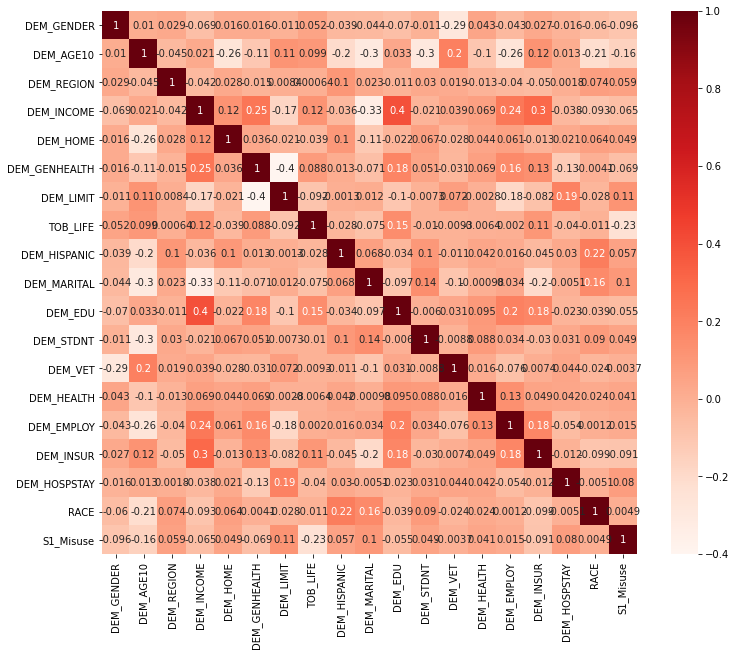

In [136]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_final.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [147]:
#cor

In [142]:
#Correlation with output variable
cor_target = abs(cor["S1_Misuse"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

DEM_AGE10      0.156245
DEM_LIMIT      0.114876
TOB_LIFE       0.232995
DEM_MARITAL    0.101684
S1_Misuse      1.000000
Name: S1_Misuse, dtype: float64

In [143]:
#cor_target

## Recursive Feature Elimination
We proceed to choose the top 7 features using `RFE()`.

In [135]:
from sklearn.feature_selection import RFE
estimator = LogisticRegression(C = 0.01)
selector = RFE(estimator,n_features_to_select=7, step=1)
selector = selector.fit(X=x_train, y=y_train)
selector.support_
idx = selector.ranking_
idx

array([ 1,  1,  2, 10, 11,  4,  1,  1,  5,  7, 12,  9,  6,  1,  8,  1,  1,
        3])

In [117]:
cols = [x_train.columns[0],x_train.columns[1],x_train.columns[6],x_train.columns[7],x_train.columns[13],x_train.columns[15],x_train.columns[16]]
lr = LogisticRegression(C=best_depth, max_iter=10000)
lr.fit(x_train[cols],y_train)
score = lr.score(x_test[cols],y_test)
print("Best score: ", score)

Best score:  0.8306181655880384


In [172]:
print("AUC score: ", roc_auc_score(y_test, lr.predict_proba(x_test[cols])[:, 1]))

AUC score:  0.7192132755270549


In [148]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

cvScore = cross_val_score(XGBClassifier(), x,y)
cvScore

array([0.8316318 , 0.83497908, 0.81372385, 0.82289923, 0.82172749])

### Gridsearch: Hyperparameter Tuning for XGBoost Classifier

Personally, I believe it's more efficient to do XGBoost runs on single threads, but instead run 4 parallel jobs in the grid search. 



In [154]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [150]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

#Denote classifier
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [156]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   43.3s finished


[15:42:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.



 Time taken: 0 hours 0 minutes and 54.33 seconds.


In [162]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)
#results


 All results:
{'mean_fit_time': array([ 7.15394537, 12.05577668, 11.39529157,  8.27280545, 10.36799542]), 'std_fit_time': array([0.03731373, 0.22378255, 0.05674231, 0.00675361, 0.16121003]), 'mean_score_time': array([0.08170962, 0.29653557, 0.29990474, 0.20261971, 0.1996576 ]), 'std_score_time': array([0.00273165, 0.00772943, 0.01531971, 0.01037264, 0.00311219]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
         

We find that our best classifier has the parameters of:  
```{'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 0.6}```

In [176]:
#xgb_clf = XGBClassifier(subsample = 1.0,min_child_weight = 5, max_depth = 5, gama = 5, colsample_bytree = 0.6)
xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, monotone_constraints='()',
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [177]:
from sklearn.metrics import accuracy_score
xgb_clf.fit(x_train, y_train)
y_pred = xgb_clf.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[17:11:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy: 83.11%


In [170]:
roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:, 1])

0.7471773175440329

In [174]:
xgb_res = pd.DataFrame({"coef" : xgb_clf.coef_[0], "word" : x_train.columns}) #creates a results dataframe to 

xgb_neg = xgb_res.sort_values('coef', ascending = True)[0:25]
xgb_neg #sort ascending starting with the most negative

AttributeError: Coefficients are not defined for Booster type None

In [ ]:
#this shows fake-related columns
xgb_pos = xgb_res.sort_values('coef', ascending = False)[0:25]#sort descending starting with the most positive
xgb_pos